<figure>
<img src="../Imagenes/logo-final-ap.png"  width="80" height="80" align="left"/> 
</figure>

# <span style="color:#4361EE"><left>Aprendizaje Profundo</left></span>

# <span style="color:red"><center>Diplomado en Inteligencia Artificial y Aprendizaje Profundo</center></span>

# <span style="color:green"><center>Predicción del valor de una acción a un día Conv-LSTM</center></span>

**<center>Aplicaciones de Redes LSTM y Redes Convolucionales</center>**

## <span style="color:#4361EE">Profesores</span>

1. Alvaro  Montenegro, PhD, ammontenegrod@unal.edu.co
1. Camilo José Torres Jiménez, Msc, cjtorresj@unal.edu.co
1. Daniel  Montenegro, Msc, dextronomo@gmail.com 

## <span style="color:#4361EE">Asesora Medios y Marketing digital</span>

4. Maria del Pilar Montenegro, pmontenegro88@gmail.com
5. Jessica López Mejía, jelopezme@unal.edu.co
6. Venus Puertas, vpuertasg@unal.edu.co

## <span style="color:#4361EE">Jefe Jurídica</span>

7. Paula Andrea Guzmán, guzmancruz.paula@gmail.com

## <span style="color:#4361EE">Coordinador Jurídico</span>

8. David Fuentes, fuentesd065@gmail.com

## <span style="color:#4361EE">Desarrolladores Principales</span>

9. Dairo Moreno, damoralesj@unal.edu.co
10. Joan Castro, jocastroc@unal.edu.co
11. Bryan Riveros, briveros@unal.edu.co
12. Rosmer Vargas, rovargasc@unal.edu.co

## <span style="color:#4361EE">Expertos en Bases de Datos</span>

13. Giovvani Barrera, udgiovanni@gmail.com
14. Camilo Chitivo, cchitivo@unal.edu.co

## <span style="color:#4361EE">Referencias</span>

1. [Introducción a Redes LSTM](Intro_LSTM.ipynb)
1. [Time Series Forecasting with LSTMs using TensorFlow 2 and Keras in Python](https://towardsdatascience.com/time-series-forecasting-with-lstms-using-tensorflow-2-and-keras-in-python-6ceee9c6c651/)
1. [Dive into Deep Learnig](https://d2l.ai/)
1. [Understanding LSTM Networks](https://colah.github.io/posts/2015-08-Understanding-LSTMs/)
1. Ralf C. Staudemeyer and Eric Rothstein Morris,[*Understanding LSTM a tutorial into Long Short-Term Memory Recurrent Neural Networks*](https://arxiv.org/pdf/1909.09586.pdf), arxiv, September 2019
1. Karpathy, [*The Unreasonable Effectiveness of Recurrent Neural Networks*](http://karpathy.github.io/2015/05/21/rnn-effectiveness/)
1. Anton Lucanus, [Making Automation More Efficient by Learning from Historical Trade Data](https://datafloq.com/read/making-automation-more-efficient-by-learning-from-/7444), 8:43 AM, January 7, 2020
1. https://www.analyticsvidhya.com/blog/2018/10/predicting-stock-price-machine-learningnd-deep-learning-techniques-python/
1. https://www.youtube.com/watch?v=2BrpKpWwT2A&list=PLQVvvaa0QuDcOdF96TBtRtuQksErCEBYZ&index=1
1. https://towardsdatascience.com/using-lstms-for-stock-market-predictions-tensorflow-9e83999d4653
1. https://github.com/llSourcell/Reinforcement_Learning_for_Stock_Prediction/blob/master/README.md
1. [Python: How to Get Live Market Data (Less Than 0.1-Second Lag](https://towardsdatascience.com/python-how-to-get-live-market-data-less-than-0-1-second-lag-c85ee280ed93)
1. [CNN-LSTM-Based Models for Multiple Parallel Input and Multi-Step Forecast](https://medium.com/towards-data-science/cnn-lstm-based-models-for-multiple-parallel-input-and-multi-step-forecast-6fe2172f7668)

## <span style="color:#4361EE">Contenido</span>

* [Introducción](#Introducción)
* [Importar las librería requeridas](#Importar-las-librería-requeridas)
* [Funciones-para-graficar-predicciones](#Funciones-para-graficar-predicciones)
* [Lectura de los datos](#Lectura-de-los-datos)
* [Extrae datos para la serie que se desea predecir-close](#Extrae-datos-para-la-serie-que-se-desea-predecir-close)
* [Visualización de la serie precio al cierre](#Visualización-de-la-serie-precio-al-cierre)
* [Preparación de los datos para el entrenamiento](#Preparación-de-los-datos-para-el-entrenamiento)
* [Crea el modelo LSTM](#Crea-el-modelo-LSTM)
* [Predicciones](#Predicciones)
* [Guarda el modelo entrenado](#Guarda-el-modelo-entrenado)
* [Intervalos de confianza. TO DO](#Intervalos-de-confianza.-TO-DO)

## <span style="color:#4361EE">Importar las librería requeridas</span>

In [31]:
import tensorflow as tf

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib widget
from sklearn.preprocessing import MinMaxScaler

#setting figure size
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 20,10

#importing required libraries
from sklearn.preprocessing import MinMaxScaler

# importa objetos de keras
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, Dropout, LSTM, Bidirectional, Conv1D, MaxPooling1D, Con
print("Versión de Tensorflow: ", tf.__version__)

# optimizador
from tensorflow.keras.optimizers import Adam

Versión de Tensorflow:  2.9.2


## <span style="color:#4361EE">Lectura de  los datos</span>

### <span style="color:black">Yahoo Finance API</span>

Como las acciones van cambiando de valor todos los días, será mejor utilizar una API que nos dé información actualizada de la bolsa.

Para esto, usaremos la API de Yahoo Finance de la bolsa de valores.

In [32]:
#!pip install yfinance
import yfinance as yf

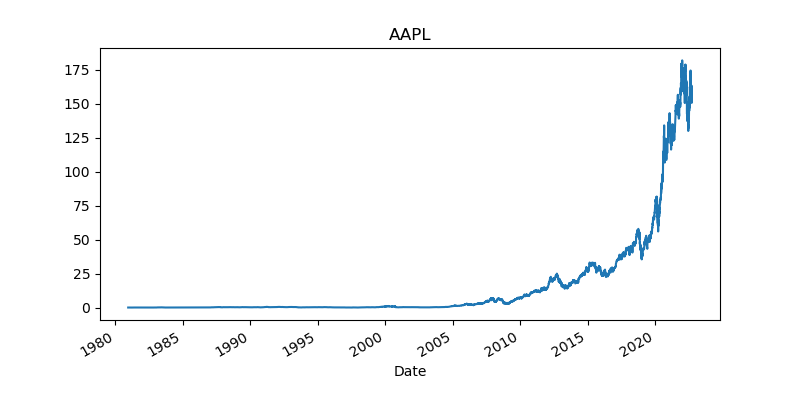

In [33]:
# Define Stock
stock = 'AAPL'

# Get data
data = yf.download(tickers=stock, period='max', interval='1d', progress=False)

#Print data
#display(data)

#Plot data
plt.close('all')
plt.figure(figsize=(8,4))
data['Close'].plot(title=stock);

In [34]:
# looking at the first five rows of the data
print(f'\n Forma de los datos: {data.shape}\n')
data.head()


 Forma de los datos: (10532, 6)



,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1980-12-12,0.128348,0.128906,0.128348,0.128348,0.100039,469033600
1980-12-15,0.122210,0.122210,0.121652,0.121652,0.094820,175884800
1980-12-16,0.113281,0.113281,0.112723,0.112723,0.087861,105728000
1980-12-17,0.115513,0.116071,0.115513,0.115513,0.090035,86441600
1980-12-18,0.118862,0.119420,0.118862,0.118862,0.092646,73449600


In [35]:
data_close = data[['Close']]
data_close.head()

,Close
Date,
1980-12-12,0.128348
1980-12-15,0.121652
1980-12-16,0.112723
1980-12-17,0.115513
1980-12-18,0.118862


Note cómo la API ya devuelve la información de manera amena, pero no tiene por qué ser así.

## <span style="color:#4361EE">Visualización de la serie precio al cierre</span>

In [36]:
# plot
len_data = len(data_close)
len_train = int(len_data*0.9) # 90%  = 9478 -> Depende de la fecha y acción elegida 
len_test = len_data - len_train # 20% = 1054 -> Depende de la fecha y acción elegida 
print (len_data, '=', len_train, '+',len_test)

10532 = 9478 + 1054


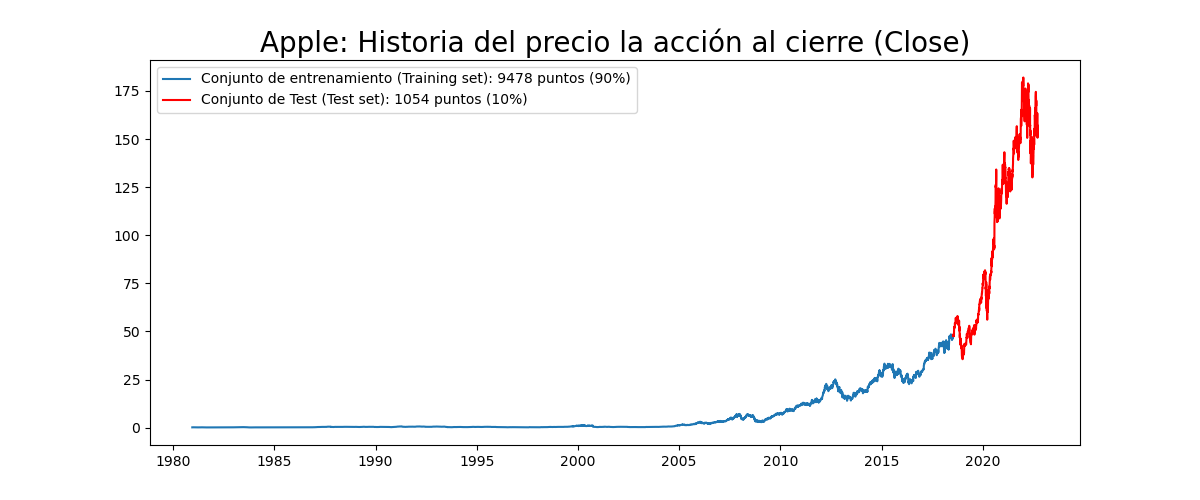

In [37]:
plt.figure(figsize=(12,5))
plt.plot(data_close[:len_train], label='Conjunto de entrenamiento (Training set): {} puntos (90%)'.format(len_train))
plt.plot(data_close['Close'][len_train:], label='Conjunto de Test (Test set): {} puntos (10%)'.format(len_test), color='r') 
plt.title("Apple: Historia del precio la acción al cierre (Close)", size = 20)
plt.legend()
plt.show()

## <span style="color:#4361EE">Preparación de los datos para el entrenamiento de la red LSTM</span>

Para evitar problemas con las tendencias y para mejorar la estimación (entrenamiento) los datos se van a transformar a la escala $[0,1]$. Para las predicciones se utiliza la transformación inversa.

### Primero extrae los valores y se crea el  objeto MinMaxScaler

In [38]:
#creating train and test sets
dataset = data_close.values

# create the scaler object and scale the data
scaler = MinMaxScaler(feature_range=(0,1))
# Scaled data
dataset = np.squeeze(np.array(scaler.fit_transform(dataset)),axis=1)

In [39]:
# Check ok
print(dataset.shape)
# Check ok in scaler
print(f'\nMin: {dataset.min()}, Max: {dataset.max()}')

(10532,)

Min: 0.0, Max: 1.0


### Crea datos de entrenamiento 

 La red LSTM tendrá como entrada "**time_step**" datos consecutivos, y como salida **1 dato** (la predicción a
 partir de esos "time_step" datos se hace para el siguiente día). 
 
 Se conformará de esta forma el set de entrenamiento

1. Número de datos consecutivos para entrenamiento: time_step = 60. 
2. Días a predecir: days = 1

### Función para crear los datos entrenamiento

In [40]:
def univariate_data(dataset, start_index, end_index, history_size, target_size):
    ''' dataset: conjunto de datos en forma de array
        start_index: índice inicial de donde empezar a tomar los datos
        end_index: índice final para tomar los datos. None para tomarlos todos
        history_size: tamaño de la ventana para crear las secuencias
        target_size: dentro de cuántas observaciones futuras desea pronosticar
    '''  
    data = []
    labels = []
    
    # Empezamos desfasados para tomar desde el incio de la serie
    start_index = start_index + history_size
    if end_index is None:
        # El último índice a tomar debe dejar espacio para el tamaño de la ventana
        end_index = len(dataset) - target_size

    for i in range(start_index, end_index+1):
        indices = range(i-history_size, i)
        # Reshape data from (history_size,) to (history_size, 1)
        data.append(np.reshape(dataset[indices], (history_size, 1)))
        # Etiquetas (Datos a predecir)
        labels.append(dataset[i+target_size-1])

    return np.array(data), np.array(labels)

Se coloca una semilla para garantizar reproductibidad dentre de tensorflow

In [41]:
# Semilla
tf.random.set_seed(500)

In [42]:
# hiperparámetros para crear las secuencias
past_history = 60 # tamaño secuencias de entrada (Ventana de tiempo)
future_target = 1 # días adelante
TRAIN_SPLIT = int(len_data*0.9) # nuḿero de datos entrenamiento

# secuencias de entrenamiento
X_train, y_train = univariate_data(dataset, start_index=0, 
                                            end_index=TRAIN_SPLIT,
                                            history_size=past_history,
                                            target_size=future_target)
#secuencias de test
# No se usará ningún dato que el modelo haya visto
X_test, y_test = univariate_data(dataset, TRAIN_SPLIT-past_history+1, None,
                                          past_history,
                                          future_target)

print(TRAIN_SPLIT)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

9478
(9419, 60, 1)
(9419,)
(1053, 60, 1)
(1053,)


In [43]:
# Visualize
train_df = pd.DataFrame(X_train[...,0], columns=[f'h_{i}' for i in range(past_history)])
pd.concat((train_df,pd.DataFrame(y_train, columns=['target'])),axis=1)

,h_0,h_1,h_2,h_3,h_4,h_5,h_6,h_7,h_8,h_9,h_10,h_11,h_12,h_13,h_14,h_15,h_16,h_17,h_18,h_19,h_20,h_21,h_22,h_23,h_24,h_25,h_26,h_27,h_28,h_29,h_30,h_31,h_32,h_33,h_34,h_35,h_36,h_37,h_38,h_39,h_40,h_41,h_42,h_43,h_44,h_45,h_46,h_47,h_48,h_49,h_50,h_51,h_52,h_53,h_54,h_55,h_56,h_57,h_58,h_59,target
0,0.000435,0.000399,0.000350,0.000365,0.000383,0.000423,0.000457,0.000488,0.000527,0.000601,0.000613,0.000592,0.000567,0.000577,0.000558,0.000521,0.000488,0.000472,0.000512,0.000506,0.000478,0.000481,0.000497,0.000491,0.000537,0.000512,0.000527,0.000537,0.000534,0.000521,0.000515,0.000491,0.000463,0.000423,0.000383,0.000408,0.000432,0.000432,0.000435,0.000399,0.000399,0.000377,0.000371,0.000356,0.000371,0.000399,0.000359,0.000325,0.000334,0.000313,0.000350,0.000359,0.000380,0.000383,0.000374,0.000368,0.000365,0.000359,0.000310,0.000282,0.000261
1,0.000399,0.000350,0.000365,0.000383,0.000423,0.000457,0.000488,0.000527,0.000601,0.000613,0.000592,0.000567,0.000577,0.000558,0.000521,0.000488,0.000472,0.000512,0.000506,0.000478,0.000481,0.000497,0.000491,0.000537,0.000512,0.000527,0.000537,0.000534,0.000521,0.000515,0.000491,0.000463,0.000423,0.000383,0.000408,0.000432,0.000432,0.000435,0.000399,0.000399,0.000377,0.000371,0.000356,0.000371,0.000399,0.000359,0.000325,0.000334,0.000313,0.000350,0.000359,0.000380,0.000383,0.000374,0.000368,0.000365,0.000359,0.000310,0.000282,0.000261,0.000282
2,0.000350,0.000365,0.000383,0.000423,0.000457,0.000488,0.000527,0.000601,0.000613,0.000592,0.000567,0.000577,0.000558,0.000521,0.000488,0.000472,0.000512,0.000506,0.000478,0.000481,0.000497,0.000491,0.000537,0.000512,0.000527,0.000537,0.000534,0.000521,0.000515,0.000491,0.000463,0.000423,0.000383,0.000408,0.000432,0.000432,0.000435,0.000399,0.000399,0.000377,0.000371,0.000356,0.000371,0.000399,0.000359,0.000325,0.000334,0.000313,0.000350,0.000359,0.000380,0.000383,0.000374,0.000368,0.000365,0.000359,0.000310,0.000282,0.000261,0.000282,0.000276
3,0.000365,0.000383,0.000423,0.000457,0.000488,0.000527,0.000601,0.000613,0.000592,0.000567,0.000577,0.000558,0.000521,0.000488,0.000472,0.000512,0.000506,0.000478,0.000481,0.000497,0.000491,0.000537,0.000512,0.000527,0.000537,0.000534,0.000521,0.000515,0.000491,0.000463,0.000423,0.000383,0.000408,0.000432,0.000432,0.000435,0.000399,0.000399,0.000377,0.000371,0.000356,0.000371,0.000399,0.000359,0.000325,0.000334,0.000313,0.000350,0.000359,0.000380,0.000383,0.000374,0.000368,0.000365,0.000359,0.000310,0.000282,0.000261,0.000282,0.000276,0.000297
4,0.000383,0.000423,0.000457,0.000488,0.000527,0.000601,0.000613,0.000592,0.000567,0.000577,0.000558,0.000521,0.000488,0.000472,0.000512,0.000506,0.000478,0.000481,0.000497,0.000491,0.000537,0.000512,0.000527,0.000537,0.000534,0.000521,0.000515,0.000491,0.000463,0.000423,0.000383,0.000408,0.000432,0.000432,0.000435,0.000399,0.000399,0.000377,0.000371,0.000356,0.000371,0.000399,0.000359,0.000325,0.000334,0.000313,0.000350,0.000359,0.000380,0.000383,0.000374,0.000368,0.000365,0.000359,0.000310,0.000282,0.000261,0.000282,0.000276,0.000297,0.000325
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9414,0.239795,0.241293,0.244618,0.244068,0.237144,0.227416,0.226757,0.223597,0.224572,0.225356,0.222745,0.226784,0.232060,0.242323,0.242763,0.252298,0.254125,0.255348,0.257148,0.260830,0.258838,0.258233,0.255884,0.258275,0.256640,0.255705,0.257519,0.256873,0.258522,0.258233,0.258824,0.257890,0.257340,0.256475,0.261105,0.263290,0.265323,0.266243,0.265529,0.263111,0.262465,0.263908,0.261737,0.261874,0.259181,0.259044,0.254854,0.255967,0.254538,0.253796,0.250017,0.253122,0.252752,0.254593,0.254057,0.256901,0.252422,0.254455,0.257986,0.261572,0.261256
9415,0.241293,0.244618,0.244068,0.237144,0.227416,0.226757,0.223597,0.224572,0.225356,0.222745,0.226784,0.232060,0.242323,0.242763,0.252298,0.254

In [44]:
print(dataset[:61].shape)
dataset[:61]

(61,)


array([0.00043548, 0.00039868, 0.00034961, 0.00036495, 0.00038335,
       0.00042322, 0.00045695, 0.00048762, 0.00052749, 0.00060109,
       0.00061336, 0.00059189, 0.00056736, 0.00057656, 0.00055816,
       0.00052135, 0.00048762, 0.00047229, 0.00051215, 0.00050602,
       0.00047842, 0.00048149, 0.00049682, 0.00049069, 0.00053669,
       0.00051215, 0.00052749, 0.00053669, 0.00053362, 0.00052135,
       0.00051522, 0.00049069, 0.00046309, 0.00042322, 0.00038335,
       0.00040788, 0.00043242, 0.00043242, 0.00043548, 0.00039868,
       0.00039868, 0.00037722, 0.00037108, 0.00035575, 0.00037108,
       0.00039868, 0.00035881, 0.00032508, 0.00033428, 0.00031281,
       0.00034961, 0.00035881, 0.00038029, 0.00038335, 0.00037415,
       0.00036801, 0.00036495, 0.00035881, 0.00030975, 0.00028214,
       0.00026068])

In [45]:
test_df = pd.DataFrame(X_test[...,0], columns=[f'h_{i}' for i in range(past_history)])
pd.concat((test_df,pd.DataFrame(y_test, columns=['target'])),axis=1)

,h_0,h_1,h_2,h_3,h_4,h_5,h_6,h_7,h_8,h_9,h_10,h_11,h_12,h_13,h_14,h_15,h_16,h_17,h_18,h_19,h_20,h_21,h_22,h_23,h_24,h_25,h_26,h_27,h_28,h_29,h_30,h_31,h_32,h_33,h_34,h_35,h_36,h_37,h_38,h_39,h_40,h_41,h_42,h_43,h_44,h_45,h_46,h_47,h_48,h_49,h_50,h_51,h_52,h_53,h_54,h_55,h_56,h_57,h_58,h_59,target
0,0.227416,0.226757,0.223597,0.224572,0.225356,0.222745,0.226784,0.232060,0.242323,0.242763,0.252298,0.254125,0.255348,0.257148,0.260830,0.258838,0.258233,0.255884,0.258275,0.256640,0.255705,0.257519,0.256873,0.258522,0.258233,0.258824,0.257890,0.257340,0.256475,0.261105,0.263290,0.265323,0.266243,0.265529,0.263111,0.262465,0.263908,0.261737,0.261874,0.259181,0.259044,0.254854,0.255967,0.254538,0.253796,0.250017,0.253122,0.252752,0.254593,0.254057,0.256901,0.252422,0.254455,0.257986,0.261572,0.261256,0.257863,0.262190,0.262603,0.262026,0.262767
1,0.226757,0.223597,0.224572,0.225356,0.222745,0.226784,0.232060,0.242323,0.242763,0.252298,0.254125,0.255348,0.257148,0.260830,0.258838,0.258233,0.255884,0.258275,0.256640,0.255705,0.257519,0.256873,0.258522,0.258233,0.258824,0.257890,0.257340,0.256475,0.261105,0.263290,0.265323,0.266243,0.265529,0.263111,0.262465,0.263908,0.261737,0.261874,0.259181,0.259044,0.254854,0.255967,0.254538,0.253796,0.250017,0.253122,0.252752,0.254593,0.254057,0.256901,0.252422,0.254455,0.257986,0.261572,0.261256,0.257863,0.262190,0.262603,0.262026,0.262767,0.261325
2,0.223597,0.224572,0.225356,0.222745,0.226784,0.232060,0.242323,0.242763,0.252298,0.254125,0.255348,0.257148,0.260830,0.258838,0.258233,0.255884,0.258275,0.256640,0.255705,0.257519,0.256873,0.258522,0.258233,0.258824,0.257890,0.257340,0.256475,0.261105,0.263290,0.265323,0.266243,0.265529,0.263111,0.262465,0.263908,0.261737,0.261874,0.259181,0.259044,0.254854,0.255967,0.254538,0.253796,0.250017,0.253122,0.252752,0.254593,0.254057,0.256901,0.252422,0.254455,0.257986,0.261572,0.261256,0.257863,0.262190,0.262603,0.262026,0.262767,0.261325,0.263358
3,0.224572,0.225356,0.222745,0.226784,0.232060,0.242323,0.242763,0.252298,0.254125,0.255348,0.257148,0.260830,0.258838,0.258233,0.255884,0.258275,0.256640,0.255705,0.257519,0.256873,0.258522,0.258233,0.258824,0.257890,0.257340,0.256475,0.261105,0.263290,0.265323,0.266243,0.265529,0.263111,0.262465,0.263908,0.261737,0.261874,0.259181,0.259044,0.254854,0.255967,0.254538,0.253796,0.250017,0.253122,0.252752,0.254593,0.254057,0.256901,0.252422,0.254455,0.257986,0.261572,0.261256,0.257863,0.262190,0.262603,0.262026,0.262767,0.261325,0.263358,0.262754
4,0.225356,0.222745,0.226784,0.232060,0.242323,0.242763,0.252298,0.254125,0.255348,0.257148,0.260830,0.258838,0.258233,0.255884,0.258275,0.256640,0.255705,0.257519,0.256873,0.258522,0.258233,0.258824,0.257890,0.257340,0.256475,0.261105,0.263290,0.265323,0.266243,0.265529,0.263111,0.262465,0.263908,0.261737,0.261874,0.259181,0.259044,0.254854,0.255967,0.254538,0.253796,0.250017,0.253122,0.252752,0.254593,0.254057,0.256901,0.252422,0.254455,0.257986,0.261572,0.261256,0.257863,0.262190,0.262603,0.262026,0.262767,0.261325,0.263358,0.262754,0.262987
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048,0.722743,0.746429,0.743571,0.759619,0.778249,0.778249,0.755057,0.764895,0.751100,0.763246,0.777699,0.785174,0.804024,0.807816,0.795890,0.801331,0.799298,0.815675,0.825017,0.807981,0.829579,0.840790,0.853485,0.846560,0.840295,0.832876,0.861399,0.864476,0.892834,0.887338,0.879095,0.912729,0.910970,0.908442,0.905804,0.906079,0.929820,0.925698,0.945538,0.951528,0.950649,0.959002,0.956804,0.942350,0.920642,0.918774,0.920422,0.934162,0.898934,0.886624,0.873050,0.863762,0.867829,0.856013,0.848979,0.856837,0.848594,0.864586,0.897890,0.845187,0.853265
1049,0.746429,0.743571,0.759619,0.778249,0.778249,0.755057,0.764895,0.751100,0.763246,0.777699,0.785174,0.804024,0.807816,0.795890,0.801331,0.799

In [46]:
print(dataset[-61:].shape)
dataset[-61:]

(61,)


array([0.7782491 , 0.7782491 , 0.75505729, 0.76489454, 0.75110039,
       0.76324581, 0.7776995 , 0.78517363, 0.80402388, 0.80781584,
       0.79589021, 0.80133097, 0.79929759, 0.81567471, 0.82501736,
       0.80798078, 0.82957879, 0.84078995, 0.85348506, 0.84656044,
       0.84029536, 0.83287624, 0.86139878, 0.86447643, 0.89283411,
       0.88733843, 0.8790949 , 0.91272855, 0.91096989, 0.90844193,
       0.90580394, 0.90607874, 0.92982014, 0.92569838, 0.94553781,
       0.95152809, 0.95064876, 0.95900223, 0.9568039 , 0.9423503 ,
       0.92064236, 0.91877376, 0.92042248, 0.9341617 , 0.89893433,
       0.88662404, 0.87304969, 0.86376197, 0.86782881, 0.85601303,
       0.84897856, 0.85683743, 0.8485939 , 0.86458629, 0.89789013,
       0.84518652, 0.85326519, 0.83710785, 0.82793007, 0.84870376,
       0.86200331])

## <span style="color:#4361EE">Crea el modelo ConvLSTM</span>

In [63]:
# shapes
input_shape = (X_train.shape[1], X_train.shape[2])
units = 50

# layers
inputs = Input(input_shape)

x = Conv1D(filters=64, kernel_size=9, activation='relu')(inputs)
x = MaxPooling1D(pool_size=2)(x)
x = Dropout(0.2, name= 'Dropout_01')(x)
x = LSTM(units=units, name='LSTM_layer')(x)
#x = LSTM(units=units, return_sequences=True,name='LSTM_layer')(inputs)
#x = Dropout(0.4)
#x = LSTM(units=units//2, name='LSTM_layer_2')(x)
#x = Dropout(0.4)
x = Dropout(0.2, name= 'Dropout_02')(x)
outputs = Dense(1)(x)

# model
model_01 = Model(inputs=inputs, outputs=outputs, name='series_Conv_LSTM_model')
model_01.summary()

Model: "series_Conv_LSTM_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_5 (InputLayer)        [(None, 60, 1)]           0         
                                                                 
 conv1d_4 (Conv1D)           (None, 52, 64)            640       
                                                                 
 max_pooling1d_3 (MaxPooling  (None, 26, 64)           0         
 1D)                                                             
                                                                 
 Dropout_01 (Dropout)        (None, 26, 64)            0         
                                                                 
 LSTM_layer (LSTM)           (None, 50)                23000     
                                                                 
 Dropout_02 (Dropout)        (None, 50)                0         
                                            

###  Callbacks

In [170]:
import os
os.makedirs(f'../Checkpoints/{future_target}_dia_convlstm', exist_ok=True)


checkpoint_filepath = f'../Checkpoints/{future_target}_dia_convlstm'
checkpoint_callback = ModelCheckpoint(
 filepath=checkpoint_filepath,
 save_weights_only=False,
 monitor="val_loss",
 mode="min",
 save_best_only=True)

early_stopping_callback = EarlyStopping(
 monitor="val_loss",
 min_delta=0.005,
 patience=10,
 mode="min"
)

rlrop_callback = ReduceLROnPlateau(monitor='val_loss', factor=0.2, mode='min', patience=3, min_lr=0.00001)

###  Compila

Se usará el optimizador Adam y la función de pérdida MSE

In [64]:
model_01.compile(loss='mean_squared_error',
  optimizer=Adam(0.001))

### Entrena el modelo


In [65]:
epochs=20

history = model_01.fit(
    X_train, y_train,
    epochs=epochs,
    batch_size=32,
    validation_split=0.1,
    verbose=1,
    shuffle=False,
    callbacks=[early_stopping_callback, checkpoint_callback, rlrop_callback]
)

Epoch 1/5


2022-09-21 15:34:28.493191: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-09-21 15:34:28.626943: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


 11/265 [>.............................] - ETA: 2s - loss: 2.5231e-05 

2022-09-21 15:34:28.700167: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


265/265 [==============================] - ETA: 0s - loss: 4.1654e-05

2022-09-21 15:34:31.697410: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-09-21 15:34:31.739534: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


265/265 [==============================] - 4s 12ms/step - loss: 4.1654e-05 - val_loss: 0.0013
Epoch 2/5
265/265 [==============================] - 3s 11ms/step - loss: 3.2727e-04 - val_loss: 0.0034
Epoch 3/5
265/265 [==============================] - 3s 11ms/step - loss: 2.3505e-04 - val_loss: 0.0025
Epoch 4/5
265/265 [==============================] - 3s 11ms/step - loss: 1.3423e-04 - val_loss: 3.8115e-04
Epoch 5/5
265/265 [==============================] - 3s 11ms/step - loss: 4.8638e-05 - val_loss: 6.9825e-05


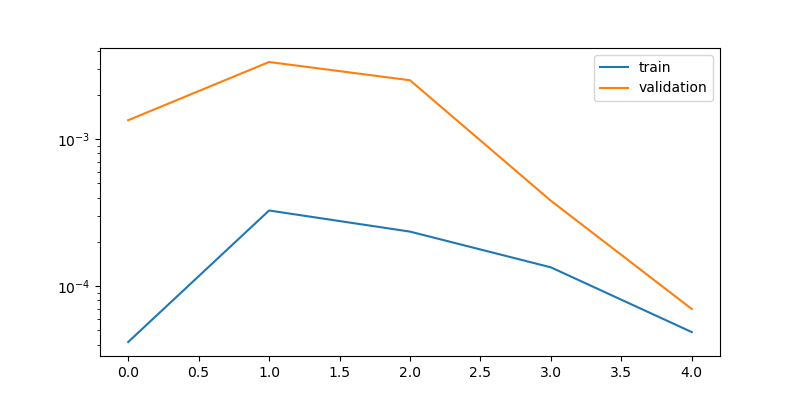

In [66]:
#Plot data
plt.close('all')
plt.figure(figsize=(8,4))
plt.semilogy(history.history['loss'], label='train')
plt.semilogy(history.history['val_loss'], label='validation')
plt.legend();

## <span style="color:#4361EE">Predicciones</span>

### Prepara los datos de validación

In [67]:
X_test.shape

(1053, 60, 1)

### Calcula predicciones

In [68]:
# predictions
prediction1 = model_01.predict(X_test)
#prediction = scaler.inverse_transform(prediction)

22/33 [===================>..........] - ETA: 0s

2022-09-21 15:34:46.244573: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-09-21 15:34:46.284834: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


33/33 [==============================] - 0s 6ms/step


In [69]:
print(prediction1.shape)
print(y_test.shape)


(1053, 1)
(1053,)


### Elimina dimensiones sobrante para los gráficos

In [70]:
y_train_p1 = y_train #np.squeeze(y_train, axis=-1)
y_test_p1 = y_test #np.squeeze(y_test, axis=-1)
y_pred_p1 = np.squeeze(prediction1, axis=-1)

In [71]:
print(y_train_p1.shape)
print(y_test_p1.shape)
print(y_pred_p1.shape)

k=0
print('|-------test------|---pred--|----------dif---------|')
for i,j in zip(y_test_p1, y_pred_p1):
    print (i,j, i-j)
    k+=1
    if k==10:
        break

(9419,)
(1053,)
(1053,)
|-------test------|---pred--|----------dif---------|
0.2627674160750257 0.24585715 0.016910266712461597
0.26132479416579846 0.24658784 0.014736951462932857
0.26335821327939013 0.24707752 0.016280688617372308
0.2627536844058564 0.24776155 0.014992136840396186
0.2629872485680162 0.24811095 0.014876298574882652
0.2648969988015629 0.24856985 0.016327152648303644
0.26739754623947415 0.24905145 0.018346094556429715
0.26655945320378066 0.249533 0.017026455595595846
0.2621216712296038 0.2500078 0.012113863021138205
0.2606515859820381 0.25031298 0.010338601992322505


### Gráfica de las predicciones

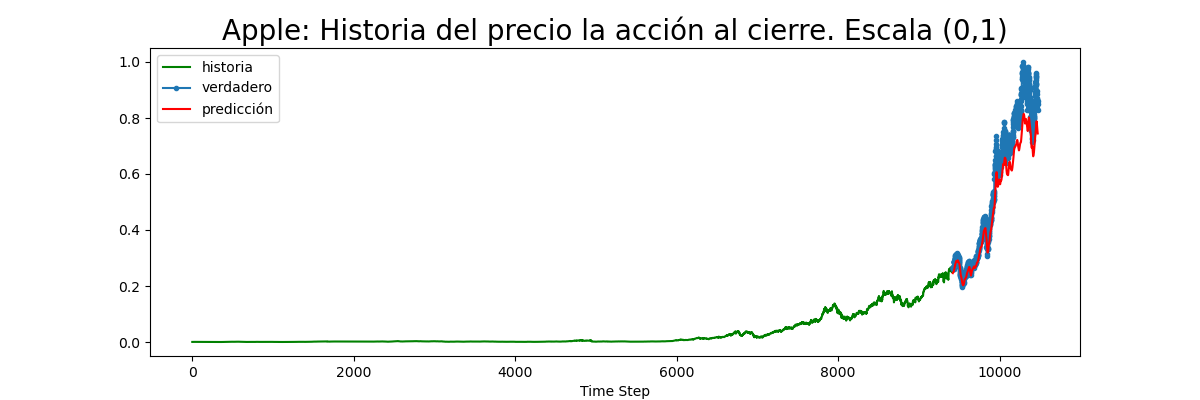

In [72]:
plt.close('all')
plt.figure(figsize=(12,4))
plt.plot(np.arange(0, len(y_train_p1)), y_train_p1, 'g', label="historia")
plt.plot(np.arange(len(y_train_p1), len(y_train_p1) + len(y_test_p1)), y_test_p1, marker='.', label="verdadero")
plt.plot(np.arange(len(y_train_p1), len(y_train_p1) + len(y_test_p1)), y_pred_p1, 'r', label="predicción")
#plt.ylabel('Valor')
plt.xlabel('Time Step')
plt.title("Apple: Historia del precio la acción al cierre. Escala (0,1)", size = 20)
plt.legend()
plt.show();

### Regreso a la escala original

In [73]:
y_pred_or1 = scaler.inverse_transform(y_pred_p1.reshape(-1,1))
y_test_or1 = scaler.inverse_transform(y_test_p1.reshape(-1,1))

In [74]:
k=0
for i,j in zip(y_test_or1, y_pred_or1):
    print (i,j, i-j)
    k+=1
    if k==10:
        break

[47.86249924] [44.785492] [3.07700729]
[47.59999847] [44.91845] [2.68154907]
[47.97000122] [45.007553] [2.96244812]
[47.86000061] [45.13202] [2.72798157]
[47.90250015] [45.195595] [2.70690536]
[48.25] [45.279095] [2.9709053]
[48.70500183] [45.36673] [3.33827209]
[48.55250168] [45.454353] [3.09814835]
[47.74499893] [45.540752] [2.20424652]
[47.47750092] [45.596283] [1.88121796]


In [75]:
rmsLSTM = np.sqrt(np.mean(np.power(y_pred_or1-y_test_or1,2)))
print(rmsLSTM )

15.278443871190127


In [76]:
y_pred_or1.shape

(1053, 1)

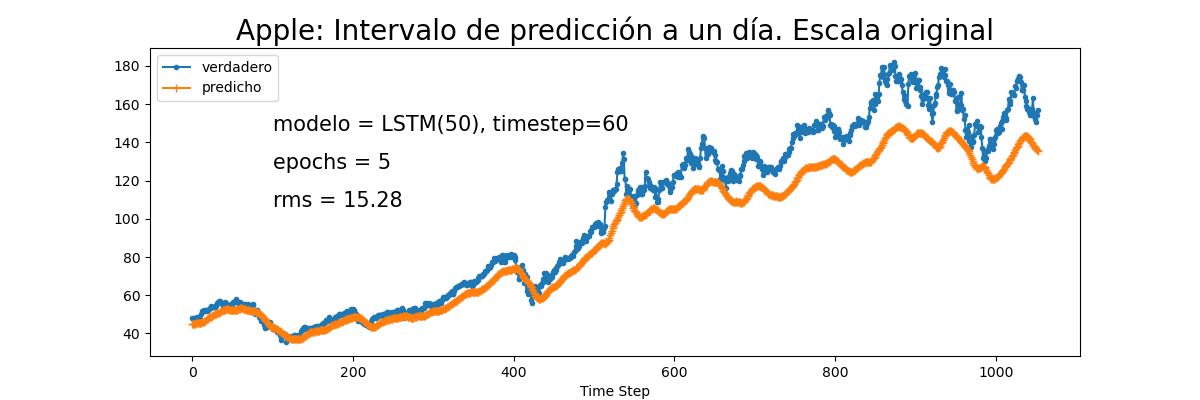

In [77]:
plt.close('all')
plt.figure(figsize=(12,4))
plt.plot(np.arange(0, len(y_test_or1)), y_test_or1, marker='.', label="verdadero")
plt.plot(np.arange(0, len(y_pred_or1)), y_pred_or1, marker='+', label="predicho")
plt.xlabel('Time Step')

plt.annotate("modelo = LSTM(50), timestep=60" , xy=(100, 146), size = 15)
plt.annotate(f"epochs = {epochs}" , xy=(100, 126), size = 15)
plt.annotate("rms = "+str(round(rmsLSTM,2)) , xy=(100, 106), size = 15)
plt.title("Apple: Intervalo de predicción a un día. Escala original", size = 20)
plt.legend()
plt.show();

## <span style="color:#4361EE">Guarda el modelo entrenado</span>

In [78]:
model_01.save(f'../Modelos/modelo_Conv_LSTM_{stock}_{future_target}_dia.h5')

## <span style="color:#4361EE">Intervalos de confianza. TO DO</span>

### Recupera la  configuración del modelo

In [329]:
print(model_01.get_config())

{'name': 'series_LSTM_model', 'layers': [{'class_name': 'InputLayer', 'config': {'batch_input_shape': (None, 60, 1), 'dtype': 'float32', 'sparse': False, 'ragged': False, 'name': 'input_5'}, 'name': 'input_5', 'inbound_nodes': []}, {'class_name': 'Dropout', 'config': {'name': 'Dropout_01', 'trainable': True, 'dtype': 'float32', 'rate': 0.2, 'noise_shape': None, 'seed': None}, 'name': 'Dropout_01', 'inbound_nodes': [[['input_5', 0, 0, {}]]]}, {'class_name': 'LSTM', 'config': {'name': 'LSTM_layer', 'trainable': True, 'dtype': 'float32', 'return_sequences': False, 'return_state': False, 'go_backwards': False, 'stateful': False, 'unroll': False, 'time_major': False, 'units': 50, 'activation': 'tanh', 'recurrent_activation': 'sigmoid', 'use_bias': True, 'kernel_initializer': {'class_name': 'GlorotUniform', 'config': {'seed': None}, 'shared_object_id': 2}, 'recurrent_initializer': {'class_name': 'Orthogonal', 'config': {'gain': 1.0, 'seed': None}, 'shared_object_id': 3}, 'bias_initializer': 

## <span style="color:#4361EE">Crea el modelo LSTM bidirecional</span>

In [330]:
# shapes
input_shape = (X_train.shape[1], X_train.shape[2])
units_2 = 64
dropout = 0.2

# layers
inputs = Input(input_shape)
x = Dropout(dropout, name= 'Dropout_01')(inputs)
x = Bidirectional(LSTM(units, return_sequences=True,dropout=dropout,
    recurrent_dropout=dropout,))(x)
x = Bidirectional(LSTM(units//4, dropout=dropout,
    recurrent_dropout=dropout,))(x)
x = Dropout(dropout, name= 'Dropout_02')(x)
outputs = Dense(1)(x)

# model
model_02 = Model(inputs=inputs, outputs=outputs, name='series_LSTM_model')
model_02.summary()


Model: "series_LSTM_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_6 (InputLayer)        [(None, 60, 1)]           0         
                                                                 
 Dropout_01 (Dropout)        (None, 60, 1)             0         
                                                                 
 bidirectional (Bidirectiona  (None, 60, 100)          20800     
 l)                                                              
                                                                 
 bidirectional_1 (Bidirectio  (None, 24)               10848     
 nal)                                                            
                                                                 
 Dropout_02 (Dropout)        (None, 24)                0         
                                                                 
 dense_5 (Dense)             (None, 1)           

###  Compila

Se usará el optimizador Adam y la función de pérdida MSE

In [331]:
model_02.compile(loss='mean_squared_error',
  optimizer=Adam(0.001),metrics=["mae"])


In [ ]:
tf.random.set_seed(500)

history = model_02.fit(
    X_train, y_train,
    epochs=10,
    batch_size=64,
    validation_split=0.1,
    verbose=1,
    shuffle=False
)

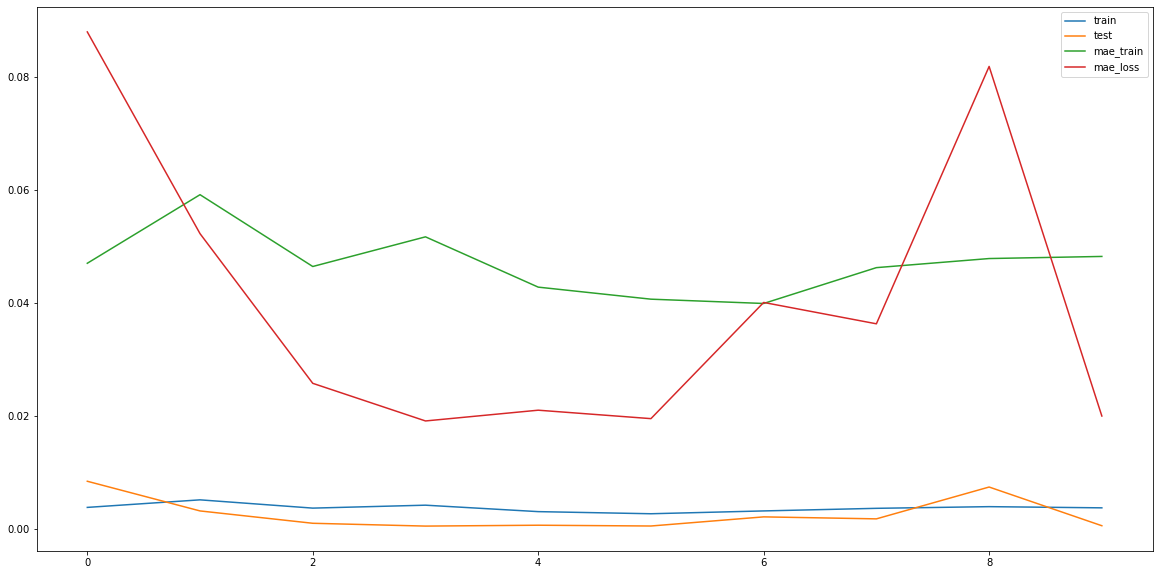

In [120]:
plt.plot(history.history['loss'][:], label='train')
plt.plot(history.history['val_loss'][:], label='test')
plt.plot(history.history['mae'][:], label='mae_train')
plt.plot(history.history['val_mae'][:], label='mae_loss')
plt.legend();

## <span style="color:#4361EE">Predicciones</span>

### Prepara los datos de validación

In [121]:
X_test.shape

(543, 60, 1)

### Calcula predicciones

In [122]:
# predictions
prediction2 = model_02.predict(X_test)
#prediction = scaler.inverse_transform(prediction)

In [124]:
print(prediction2.shape)
print(y_test.shape)


(543, 1)
(543,)


### Elimina dimensiones sobrante para los gráficos

In [125]:
y_train_p2 = y_train #np.squeeze(y_train, axis=-1)
y_test_p2 = y_test#np.squeeze(y_test, axis=-1)
y_pred_p2 = np.squeeze(prediction2, axis=-1)

In [126]:
print(y_train_p2.shape)
print(y_test_p2.shape)
print(y_pred_p2.shape)

k=0
for i,j in zip(y_test_p2, y_pred_p2):
    print (i,j, i-j)
    k+=1
    if k==10:
        break

(2355,)
(543,)
(543,)
0.6783307719588605 0.66155297 0.01677780631783876
0.6719470386570517 0.66234887 0.009598172194344223
0.6727745596406196 0.6638678 0.008906788015100808
0.6698782361981322 0.66457427 0.005303970718090745
0.6474169523584349 0.66511256 -0.017695602668573174
0.6435157820073296 0.665191 -0.021675212732202853
0.6412105449816764 0.6639345 -0.022723983845990836
0.6212318240926825 0.6625547 -0.04132285720843443
0.6321078141624307 0.66143036 -0.02932254472428808
0.6292114907199433 0.66006935 -0.03085785570797417


### Gráfica de las predicciones

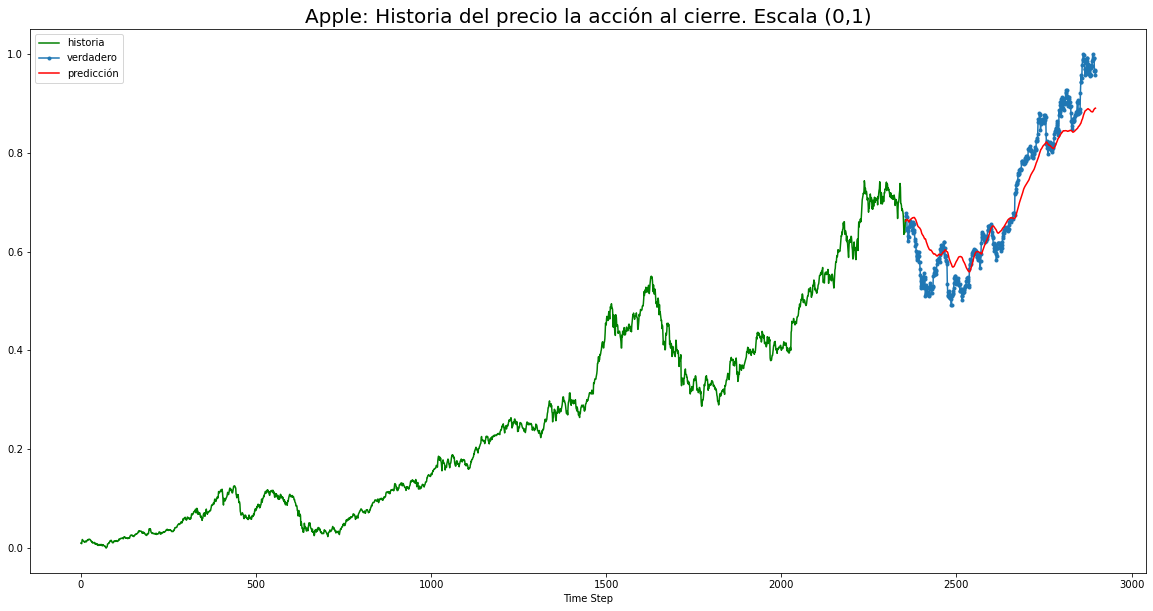

In [127]:
plt.plot(np.arange(0, len(y_train_p2)), y_train_p2, 'g', label="historia")
plt.plot(np.arange(len(y_train_p2), len(y_train_p2) + len(y_test_p2)), y_test_p2, marker='.', label="verdadero")
plt.plot(np.arange(len(y_train_p2), len(y_train_p2) + len(y_test_p2)), y_pred_p2, 'r', label="predicción")
#plt.ylabel('Valor')
plt.xlabel('Time Step')
plt.title("Apple: Historia del precio la acción al cierre. Escala (0,1)", size = 20)
plt.legend()
plt.show();

### Regreso a la escala original

In [129]:
y_pred_or2 = scaler.inverse_transform(y_pred_p2.reshape(-1,1))
y_test_or2 = scaler.inverse_transform(y_test_p2.reshape(-1,1))

In [130]:
k=0
for i,j in zip(y_test_or2, y_pred_or2):
    print (i,j, i-j)
    k+=1
    if k==10:
        break

[122.] [119.16153] [2.83847046]
[120.92] [119.29618] [1.62381927]
[121.06] [119.55315] [1.50685364]
[120.57] [119.67267] [0.89733154]
[116.77] [119.76374] [-2.99374054]
[116.11] [119.77701] [-3.66700806]
[115.72] [119.56444] [-3.84443787]
[112.34] [119.331] [-6.99100128]
[114.18] [119.140785] [-4.96078522]
[113.69] [118.91053] [-5.22053009]


In [132]:
rmsLSTM = np.sqrt(np.mean(np.power(y_pred_or2-y_test_or2,2)))
print(rmsLSTM )

8.763895448817458


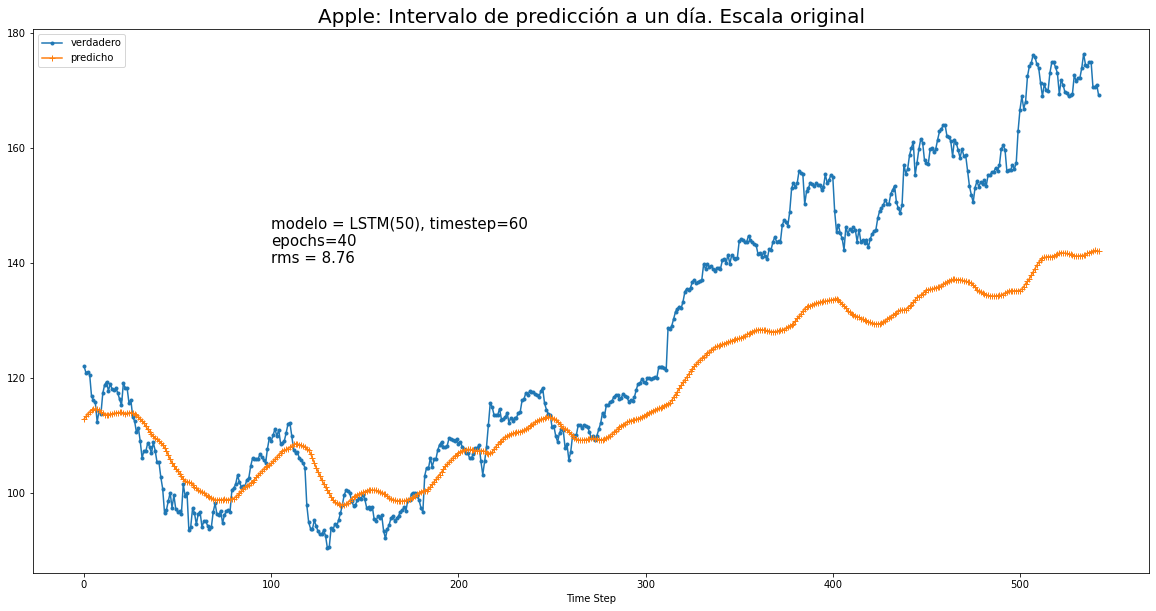

In [133]:
plt.plot(np.arange(0, len(y_test_or)), y_test_or, marker='.', label="verdadero")
plt.plot(np.arange(0, len(y_test_or)), y_pred_or, marker='+', label="predicho")
plt.xlabel('Time Step')
plt.annotate("rms = "+str(round(rmsLSTM,2)) , xy=(100, 140), size = 15)
plt.annotate("modelo = LSTM(50), timestep=60" , xy=(100, 146), size = 15)
plt.annotate("epochs=40" , xy=(100, 143), size = 15)
plt.title("Apple: Intervalo de predicción a un día. Escala original", size = 20)
plt.legend()
plt.show();